# Case Study 1

#### Model selection for Clustering

Clustering is an unsupervised learning: the resulting clusters are completely derived from data distributed in given a feature set with no class available

Compared to supervised learning counterparts, it is …
* hard to define model performance (cluster quality)
* sensitive to different clustering algorithms and different feature spaces.



#### Task
Your task is to try different clustering algorithms and also a range of the potential parameter(s) which affect the number of clusters including ..

* K-means
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* Gaussian Mixture Model, 
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
* Hierarchical Clustering, 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
* Louvain Clustering, 
https://scikit-network.readthedocs.io/en/latest/reference/clustering.html#module-sknetwork.clustering

on 5K colorectal patches represented by 4 different representation PathologyGAN, ResNet50, InceptionV3 and VGG16


#### Data and its preprocessing 
5,000 non-overlapping image patches from hematoxylin & eosin (H&E) stained histological images of human colorectal cancer (CRC) and normal tissue.
* 4 feature sets, PathologyGAN, ResNet50, InceptionV3 and VGG16, are extracted to represent those 5,000 images different dimensional feature spaces.
* PCA and UMAP were employed to reduce each feature sapce into 100-dimensional vectors

* 9 tissue types are also available which include Adipose (ADI), background (BACK), debris (DEB), lymphocytes (LYM), mucus (MUC), smooth muscle (MUS), normal colon mucosa (NORM), cancer-associated stroma (STR), colorectal adenocarcinoma epithelium (TUM)


#### Performance Measurement
To assess quality of clustering solutions, several approaches are expected to be done and interpreted which include...
* Silhouette Score for goodness of fit test
* Vmeasure Score for homogeneity and completeness test (tissue type available as ground truth)
* Clusters visualisations

For more information, please have a check...
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation


#### Report
Report on your preprocessing pipeline, theory and intuition behinds each algorithm and representation, parameter searching and performance evaluation frameworks. If there is any addiotional process, give evidences/justifications on how it helps.

#### Required Packages

### Prepare Tissue Representations

In [ ]:
import h5py
import numpy as np
import pickle
import matplotlib.pyplot as plt


In [ ]:
pge_path = 'pge_dim_reduced_feature.h5'
resnet50_path = 'resnet50_dim_reduced_feature.h5'

pge_content = h5py.File(pge_path, mode='r')
resnet50_content = h5py.File(resnet50_path, mode='r')


In [ ]:
#PCA feature from 4 feature sets: pge_latent, resnet50_latent, inceptionv3_latent, vgg16_latent
pge_pca_feature  = pge_content['pca_feature'][:]
resnet50_pca_feature  = resnet50_content['pca_feature'][:]

In [ ]:
#UMAP feature from 4 feature sets: pge_latent, resnet50_latent, inceptionv3_latent, vgg16_latent
pge_umap_feature  = pge_content['umap_feature'][:]
resnet50_umap_feature = resnet50_content['umap_feature'][:]

In [ ]:
#tissue type as available ground-truth: labels
filename  = np.squeeze(pge_content['file_name'])
filename = np.array([str(x) for x in filename])
labels = np.array([x.split('/')[2] for x in filename])
labels

array(['ADI', 'ADI', 'ADI', ..., 'TUM', 'TUM', 'TUM'], dtype='<U4')

# Example

In [ ]:

import random

In [ ]:
random.seed(0)
pge_pca_selected_index = random.sample(list(np.arange(len(pge_pca_feature))), 200)
pge_pca_selected_index = random.sample(list(np.arange(len(pge_pca_feature))), 200)

pge_umap_selected_index = random.sample(list(np.arange(len(pge_umap_feature))), 200)
pge_umap_selected_index = random.sample(list(np.arange(len(pge_umap_feature))), 200)

resnet50_pca_selected_index = random.sample(list(np.arange(len(resnet50_pca_feature))), 200)
resnet50_pca_selected_index = random.sample(list(np.arange(len(resnet50_pca_feature))), 200)

resnet50_umap_selected_index = random.sample(list(np.arange(len(resnet50_umap_feature))), 200)
resnet50_umap_selected_index = random.sample(list(np.arange(len(resnet50_umap_feature))), 200)



In [ ]:

pge_pca_test_data = pge_pca_feature[pge_pca_selected_index]
pge_pca_test_label = labels[pge_pca_selected_index]

pge_umap_test_data = pge_umap_feature[pge_umap_selected_index]
pge_umap_test_label = labels[pge_umap_selected_index]

resnet50_pca_test_data = resnet50_pca_feature[resnet50_pca_selected_index]
resnet50_pca_test_label = labels[resnet50_pca_selected_index]

resnet50_umap_test_data = resnet50_umap_feature[resnet50_umap_selected_index]
resnet50_umap_test_label = labels[resnet50_umap_selected_index]

### Exploratory Analysis

In [ ]:
import plotly.graph_objects as go
import pandas as pd

In [ ]:
#PGE_PCA
#3d scatter plot with 3 class
traces = []
for name in np.unique(labels):
    trace = go.Scatter3d(
        x=pge_pca_test_data[pge_pca_test_label==name,0],
        y=pge_pca_test_data[pge_pca_test_label==name,1],
        z=pge_pca_test_data[pge_pca_test_label==name,2],
        mode='markers',
        name=name,
        marker=go.scatter3d.Marker(
            size=4,
            opacity=0.8
        )

    )
    traces.append(trace)


data = go.Data(traces)
layout = go.Layout(
            showlegend=True,
    scene=go.Scene(
                xaxis=go.layout.scene.XAxis(title='PC1'),
                yaxis=go.layout.scene.YAxis(title='PC2'),
                zaxis=go.layout.scene.ZAxis(title='PC3')
                )
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    title="First 3 principal components of PathologyGAN's PCA feature",
    legend_title="Legend Title",
)

fig.show()


/usr/local/lib/python3.8/dist-packages/plotly/graph_objs/_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


/usr/local/lib/python3.8/dist-packages/plotly/graph_objs/_deprecations.py:489: DeprecationWarning:

plotly.graph_objs.Scene is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Scene




In [ ]:
#PGE_UMAP
#3d scatter plot with 3 class
traces = []
for name in np.unique(labels):
    trace = go.Scatter3d(
        x=pge_umap_test_data[pge_umap_test_label==name,0],
        y=pge_umap_test_data[pge_umap_test_label==name,1],
        z=pge_umap_test_data[pge_umap_test_label==name,2],
        mode='markers',
        name=name,
        marker=go.scatter3d.Marker(
            size=4,
            opacity=0.8
        )

    )
    traces.append(trace)


data = go.Data(traces)
layout = go.Layout(
            showlegend=True,
    scene=go.Scene(
                xaxis=go.layout.scene.XAxis(title='PC1'),
                yaxis=go.layout.scene.YAxis(title='PC2'),
                zaxis=go.layout.scene.ZAxis(title='PC3')
                )
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    title="PathologyGAN's UMAP feature",
    legend_title="Legend Title",
)

fig.show()


In [ ]:
#resnet50_pca
#3d scatter plot with 3 class
traces = []
for name in np.unique(labels):
    trace = go.Scatter3d(
        x=resnet50_pca_test_data[resnet50_pca_test_label==name,0],
        y=resnet50_pca_test_data[resnet50_pca_test_label==name,1],
        z=resnet50_pca_test_data[resnet50_pca_test_label==name,2],
        mode='markers',
        name=name,
        marker=go.scatter3d.Marker(
            size=4,
            opacity=0.8
        )

    )
    traces.append(trace)


data = go.Data(traces)
layout = go.Layout(
            showlegend=True,
    scene=go.Scene(
                xaxis=go.layout.scene.XAxis(title='PC1'),
                yaxis=go.layout.scene.YAxis(title='PC2'),
                zaxis=go.layout.scene.ZAxis(title='PC3')
                )
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    title="First 3 principal components of ResNet50's PCA feature",
    legend_title="Legend Title",
)

fig.show()


In [ ]:
#resnet50_umap
#3d scatter plot with 3 class
traces = []
for name in np.unique(labels):
    trace = go.Scatter3d(
        x=resnet50_umap_test_data[resnet50_umap_test_label==name,0],
        y=resnet50_umap_test_data[resnet50_umap_test_label==name,1],
        z=resnet50_umap_test_data[resnet50_umap_test_label==name,2],
        mode='markers',
        name=name,
        marker=go.scatter3d.Marker(
            size=4,
            opacity=0.8
        )

    )
    traces.append(trace)


data = go.Data(traces)
layout = go.Layout(
            showlegend=True,
    scene=go.Scene(
                xaxis=go.layout.scene.XAxis(title='PC1'),
                yaxis=go.layout.scene.YAxis(title='PC2'),
                zaxis=go.layout.scene.ZAxis(title='PC3')
                )
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    title="ResNet50's UMAP feature",
    legend_title="Legend Title",
)

fig.show()


### Model training

In [ ]:
# from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering


In [ ]:
#to create Adjacency matrix for  Louvain clustering
from sklearn.metrics import pairwise_distances 
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

Choosing Optimal Cluster

In [ ]:
from sklearn.metrics import silhouette_score
silhoute_score = []
for i in range(2,20,1):
  gaussian = GaussianMixture(n_components=i, random_state=100000, covariance_type="full", max_iter=50000)
  gaussian_fit_res = gaussian.fit_predict(pge_pca_test_data)
  silhoute_score.append(silhouette_score(pge_pca_test_data,gaussian_fit_res,metric='euclidean'))

In [ ]:
df_g = pd.DataFrame({"silhouette scores":silhoute_score,
                    'num':list(range(2,20,1))})

fig = px.line(df_g, x = 'num', y = "silhouette scores",
             title = "Silhoute Score for Gaussian PGE PCA")
fig.show()

PGE UMAP

In [ ]:
silhoute_score = []
for i in range(2,20,1):
  gaussian = GaussianMixture(n_components=i, random_state=100000, covariance_type="full", max_iter=50000)
  gaussian_fit_res = gaussian.fit_predict(pge_umap_test_data)
  silhoute_score.append(silhouette_score(pge_umap_test_data,gaussian_fit_res,metric='euclidean'))

In [ ]:
df_g = pd.DataFrame({"silhouette scores":silhoute_score,
                    'num':list(range(2,20,1))})

fig = px.line(df_g, x = 'num', y = "silhouette scores",
             title = "Silhoute Score for Gaussian PGE UMAP")
fig.show()

In [ ]:
silhoute_score = []
for i in range(2,20,1):
  gaussian = GaussianMixture(n_components=i, random_state=100000, covariance_type="full", max_iter=50000)
  gaussian_fit_res = gaussian.fit_predict(resnet50_pca_test_data)
  silhoute_score.append(silhouette_score(resnet50_pca_test_data,gaussian_fit_res,metric='euclidean'))

In [ ]:
df_g = pd.DataFrame({"silhouette scores":silhoute_score,
                    'num':list(range(2,20,1))})

fig = px.line(df_g, x = 'num', y = "silhouette scores",
             title = "Silhoute Score for Gaussian Resnet50 PCA")
fig.show()

In [ ]:
silhoute_score = []
for i in range(2,20,1):
  gaussian = GaussianMixture(n_components=i, random_state=100000, covariance_type="full", max_iter=50000)
  gaussian_fit_res = gaussian.fit_predict(resnet50_umap_test_data)
  silhoute_score.append(silhouette_score(resnet50_umap_test_data,gaussian_fit_res,metric='euclidean'))

In [ ]:
df_g = pd.DataFrame({"silhouette scores":silhoute_score,
                    'num':list(range(2,20,1))})

fig = px.line(df_g, x = 'num', y = "silhouette scores",
             title = "Silhoute Score for Gaussian Resnet50 UMAP")
fig.show()

Based on above plot of silhoute score we are selecting the optimal clusters

In [ ]:
gaussian_assignment_pge_pca = GaussianMixture(n_components=11, random_state=0).fit_predict(pge_pca_test_data)
gaussian_assignment_pge_umap = GaussianMixture(n_components=7, random_state=0).fit_predict(pge_umap_test_data)
gaussian_assignment_resnet50_pca = GaussianMixture(n_components=6, random_state=0).fit_predict(resnet50_pca_test_data)
gaussian_assignment_resnet50_umap = GaussianMixture(n_components=11, random_state=0).fit_predict(resnet50_umap_test_data)


In [ ]:
silhoute_score = []
for i in range(2,20,1):
  agglo = AgglomerativeClustering(n_clusters = i)
  agglo_fit_res = agglo.fit_predict(pge_pca_test_data)
  silhoute_score.append(silhouette_score(pge_pca_test_data,agglo_fit_res))


In [ ]:
df_g = pd.DataFrame({"silhouette scores":silhoute_score,
                    'num':list(range(2,20,1))})

fig = px.line(df_g, x = 'num', y = "silhouette scores",
             title = "Silhoute Score for Hierarchical PathologyGAN PCA")
fig.show()

In [ ]:
silhoute_score = []
for i in range(2,20,1):
  agglo = AgglomerativeClustering(n_clusters = i)
  agglo_fit_res = agglo.fit_predict(pge_umap_test_data)
  silhoute_score.append(silhouette_score(pge_umap_test_data,agglo_fit_res))


In [ ]:
df_g = pd.DataFrame({"silhouette scores":silhoute_score,
                    'num':list(range(2,20,1))})

fig = px.line(df_g, x = 'num', y = "silhouette scores",
             title = "Silhoute Score for Hierarchical PathologyGAN UMAP")
fig.show()

In [ ]:
silhoute_score = []
for i in range(2,20,1):
  agglo = AgglomerativeClustering(n_clusters = i)
  agglo_fit_res = agglo.fit_predict(resnet50_pca_test_data)
  silhoute_score.append(silhouette_score(resnet50_pca_test_data,agglo_fit_res))


In [ ]:
df_g = pd.DataFrame({"silhouette scores":silhoute_score,
                    'num':list(range(2,20,1))})

fig = px.line(df_g, x = 'num', y = "silhouette scores",
             title = "Silhoute Score for Hierarchical ResNet50 PCA")
fig.show()

In [ ]:
silhoute_score = []
for i in range(2,20,1):
  agglo = AgglomerativeClustering(n_clusters = i)
  agglo_fit_res = agglo.fit_predict(resnet50_umap_test_data)
  silhoute_score.append(silhouette_score(resnet50_umap_test_data,agglo_fit_res))


In [ ]:
df_g = pd.DataFrame({"silhouette scores":silhoute_score,
                    'num':list(range(2,20,1))})

fig = px.line(df_g, x = 'num', y = "silhouette scores",
             title = "Silhoute Score for Hierarchical ResNet50 UMAP")
fig.show()

In [ ]:
agglomerative_assignment_pge_pca = AgglomerativeClustering(n_clusters = 17).fit_predict(pge_pca_test_data)
agglomerative_assignment_pge_umap = AgglomerativeClustering(n_clusters = 7).fit_predict(pge_umap_test_data)
agglomerative_assignment_resnet50_pca = AgglomerativeClustering(n_clusters = 4).fit_predict(resnet50_pca_test_data)
agglomerative_assignment_resnet50_umap = AgglomerativeClustering(n_clusters = 5).fit_predict(resnet50_umap_test_data)

### Evaluation and Visualisation

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, v_measure_score
from sklearn.model_selection import KFold, train_test_split

PathologyGAN PCA

* check out number of clusters/cluster assignment counts

In [ ]:
print('Number of clusters from Gaussian: %d and from Agglomerative: %d, '%(np.unique(gaussian_assignment_pge_pca).shape[0],np.unique(agglomerative_assignment_pge_pca).shape[0]))

Number of clusters from Gaussian: 11 and from Agglomerative: 17, 


In [ ]:
gaussian_counts_pge_pca = np.unique(gaussian_assignment_pge_pca, return_counts = True)
agglomerative_counts_pge_pca = np.unique(agglomerative_assignment_pge_pca, return_counts = True)

In [ ]:
print('Gaussian assignment counts for PathologyGAN PCA')
pd.DataFrame({'Cluster Index': gaussian_counts_pge_pca[0], 'Number of members':gaussian_counts_pge_pca[1]}).set_index('Cluster Index')

Gaussian assignment counts for PathologyGAN PCA


,Number of members
Cluster Index,
0,31
1,12
2,29
3,19
4,37
5,22
6,12
7,14
8,2


In [ ]:

print('Agglomerative assignment counts for PathologyGAN PCA')
pd.DataFrame({'Cluster Index': agglomerative_counts_pge_pca[0], 'Number of members':agglomerative_counts_pge_pca[1]}).set_index('Cluster Index')

Agglomerative assignment counts for PathologyGAN PCA


,Number of members
Cluster Index,
0,17
1,10
2,14
3,7
4,24
5,19
6,19
7,9
8,4


* Assess goodness of fit by silhouette score and cluster homogeneities by V-measure

In [ ]:
gaussian_silhouette_pge_pca = silhouette_score(pge_pca_test_data, gaussian_assignment_pge_pca)
gaussian_v_measure_pge_pca = v_measure_score(pge_pca_test_label, gaussian_assignment_pge_pca)
agglomerative_silhouette_pge_pca = silhouette_score(pge_pca_test_data, agglomerative_assignment_pge_pca)
agglomerative_v_measure_pge_pca= v_measure_score(pge_pca_test_label, agglomerative_assignment_pge_pca)
pd.DataFrame({'Metrics': ['silhouette', 'V-measure'], 'Gaussian':[gaussian_silhouette_pge_pca, gaussian_v_measure_pge_pca], 'Agglomerative':[agglomerative_silhouette_pge_pca, agglomerative_v_measure_pge_pca]}).set_index('Metrics')

,Gaussian,Agglomerative
Metrics,,
silhouette,0.125794,0.131310
V-measure,0.439381,0.529675


PathologyGAN UMAP

* check out number of clusters/cluster assignment counts

In [ ]:
print('Number of clusters from Gaussian: %d and from Agglomerative: %d '%(np.unique(gaussian_assignment_pge_umap).shape[0],np.unique(agglomerative_assignment_pge_umap).shape[0]))

Number of clusters from Gaussian: 7 and from Agglomerative: 7 


In [ ]:
gaussian_counts_pge_umap = np.unique(gaussian_assignment_pge_umap, return_counts = True)
agglomerative_counts_pge_umap = np.unique(agglomerative_assignment_pge_umap, return_counts = True)

In [ ]:
print('Gaussian assignment counts for PathologyGAN UMAP')
pd.DataFrame({'Cluster Index': gaussian_counts_pge_umap[0], 'Number of members':gaussian_counts_pge_umap[1]}).set_index('Cluster Index')

Gaussian assignment counts for PathologyGAN UMAP


,Number of members
Cluster Index,
0,19
1,11
2,16
3,18
4,45
5,84
6,7


In [ ]:

print('Agglomerative assignment counts for PathologyGAN UMAP')
pd.DataFrame({'Cluster Index': agglomerative_counts_pge_umap[0], 'Number of members':agglomerative_counts_pge_umap[1]}).set_index('Cluster Index')

Agglomerative assignment counts for PathologyGAN UMAP


,Number of members
Cluster Index,
0,86
1,19
2,43
3,11
4,16
5,18
6,7


* Assess goodness of fit by silhouette score and cluster homogeneities by V-measure

In [ ]:
gaussian_silhouette_pge_umap = silhouette_score(pge_umap_test_data, gaussian_assignment_pge_umap)
gaussian_v_measure_pge_umap = v_measure_score(pge_umap_test_label, gaussian_assignment_pge_umap)
agglomerative_silhouette_pge_umap = silhouette_score(pge_umap_test_data, agglomerative_assignment_pge_umap)
agglomerative_v_measure_pge_umap = v_measure_score(pge_umap_test_label, agglomerative_assignment_pge_umap)
pd.DataFrame({'Metrics': ['silhouette', 'V-measure'], 'Gaussian':[gaussian_silhouette_pge_umap, gaussian_v_measure_pge_umap], 'Agglomerative':[agglomerative_silhouette_pge_umap, agglomerative_v_measure_pge_umap]}).set_index('Metrics')

,Gaussian,Agglomerative
Metrics,,
silhouette,0.620897,0.621587
V-measure,0.567027,0.564055


ResNet50 PCA

* check out number of clusters/cluster assignment counts

In [ ]:
print('Number of clusters from Gaussian: %d and from Agglomerative: %d '%(np.unique(gaussian_assignment_resnet50_pca).shape[0],np.unique(agglomerative_assignment_resnet50_pca).shape[0]))

Number of clusters from Gaussian: 6 and from Agglomerative: 4 


In [ ]:
gaussian_counts_resnet50_pca = np.unique(gaussian_assignment_resnet50_pca, return_counts = True)
agglomerative_counts_resnet50_pca = np.unique(agglomerative_assignment_resnet50_pca, return_counts = True)

In [ ]:
print('Gaussian assignment counts for ResNet50 PCA')
pd.DataFrame({'Cluster Index': gaussian_counts_resnet50_pca[0], 'Number of members':gaussian_counts_resnet50_pca[1]}).set_index('Cluster Index')

Gaussian assignment counts for ResNet50 PCA


,Number of members
Cluster Index,
0,30
1,29
2,50
3,51
4,29
5,11


In [ ]:

print('Agglomerative assignment counts for ResNet50 PCA')
pd.DataFrame({'Cluster Index': agglomerative_counts_resnet50_pca[0], 'Number of members':agglomerative_counts_resnet50_pca[1]}).set_index('Cluster Index')

Agglomerative assignment counts for ResNet50 PCA


,Number of members
Cluster Index,
0,134
1,28
2,27
3,11


* Assess goodness of fit by silhouette score and cluster homogeneities by V-measure

In [ ]:
gaussian_silhouette_resnet50_pca = silhouette_score(resnet50_pca_test_data, gaussian_assignment_resnet50_pca)
gaussian_v_measure_resnet50_pca = v_measure_score(resnet50_pca_test_label, gaussian_assignment_resnet50_pca)
agglomerative_silhouette_resnet50_pca = silhouette_score(resnet50_pca_test_data, agglomerative_assignment_resnet50_pca)
agglomerative_v_measure_resnet50_pca = v_measure_score(resnet50_pca_test_label, agglomerative_assignment_resnet50_pca)
pd.DataFrame({'Metrics': ['silhouette', 'V-measure'], 'Gaussian':[gaussian_silhouette_resnet50_pca, gaussian_v_measure_resnet50_pca], 'Agglomerative':[agglomerative_silhouette_resnet50_pca, agglomerative_v_measure_resnet50_pca]}).set_index('Metrics')

,Gaussian,Agglomerative
Metrics,,
silhouette,0.156532,0.152678
V-measure,0.549994,0.535174


ResNet50 UMAP

* check out number of clusters/cluster assignment counts

In [ ]:
print('Number of clusters from Gaussian: %d and from Agglomerative: %d '%(np.unique(gaussian_assignment_resnet50_umap).shape[0],np.unique(agglomerative_assignment_resnet50_umap).shape[0]))

Number of clusters from Gaussian: 11 and from Agglomerative: 5 


In [ ]:
gaussian_counts_resnet50_umap = np.unique(gaussian_assignment_resnet50_umap, return_counts = True)
agglomerative_counts_resnet50_umap = np.unique(agglomerative_assignment_resnet50_umap, return_counts = True)

In [ ]:
print('Gaussian assignment counts for ResNet50 UMAP')
pd.DataFrame({'Cluster Index': gaussian_counts_resnet50_umap[0], 'Number of members':gaussian_counts_resnet50_umap[1]}).set_index('Cluster Index')

Gaussian assignment counts for ResNet50 UMAP


,Number of members
Cluster Index,
0,31
1,29
2,32
3,17
4,8
5,3
6,39
7,3
8,33


In [ ]:

print('Agglomerative assignment counts for ResNet50 UMAP')
pd.DataFrame({'Cluster Index': agglomerative_counts_resnet50_umap[0], 'Number of members':agglomerative_counts_resnet50_umap[1]}).set_index('Cluster Index')

Agglomerative assignment counts for ResNet50 UMAP


,Number of members
Cluster Index,
0,135
1,8
2,17
3,29
4,11


* Assess goodness of fit by silhouette score and cluster homogeneities by V-measure

In [ ]:
gaussian_silhouette_resnet50_umap = silhouette_score(resnet50_umap_test_data, gaussian_assignment_resnet50_umap)
gaussian_v_measure_resnet50_umap = v_measure_score(resnet50_umap_test_label, gaussian_assignment_resnet50_umap)
agglomerative_silhouette_resnet50_umap = silhouette_score(resnet50_umap_test_data, agglomerative_assignment_resnet50_umap)
agglomerative_v_measure_resnet50_umap = v_measure_score(resnet50_umap_test_label, agglomerative_assignment_resnet50_umap)
pd.DataFrame({'Metrics': ['silhouette', 'V-measure'], 'Gaussian':[gaussian_silhouette_resnet50_umap, gaussian_v_measure_resnet50_umap], 'Agglomerative':[agglomerative_silhouette_resnet50_umap, agglomerative_v_measure_resnet50_umap]}).set_index('Metrics')

,Gaussian,Agglomerative
Metrics,,
silhouette,0.515871,0.616154
V-measure,0.686283,0.614610


* Visualise tissue type percentage in two different clustering configurations

In [ ]:
def calculate_percent(sub_df, attrib):
    cnt = sub_df[attrib].count()
    output_sub_df = sub_df.groupby(attrib).count()
    return (output_sub_df/cnt)

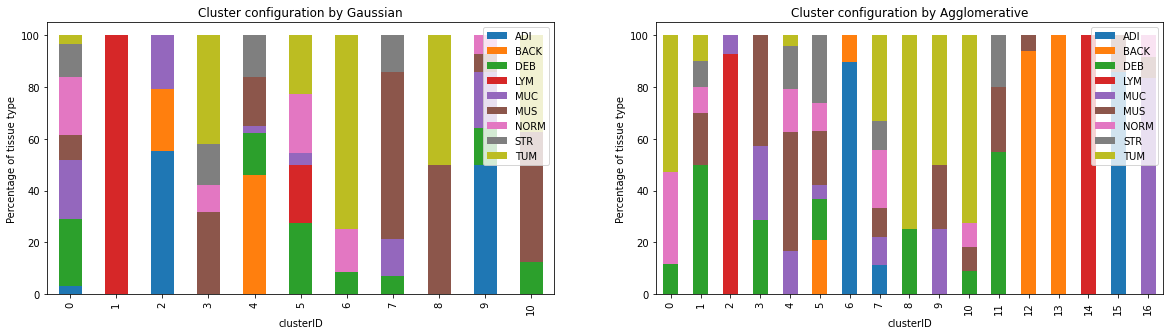

In [ ]:
#PathogenGAN PCA
resulted_cluster_df = pd.DataFrame({'clusterID': gaussian_assignment_pge_pca, 'type': pge_pca_test_label})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='upper right')
axes[0].set_title('Cluster configuration by Gaussian')

resulted_cluster_df = pd.DataFrame({'clusterID': agglomerative_assignment_pge_pca, 'type': pge_pca_test_label})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[1] )

axes[1].set_ylabel('Percentage of tissue type')
axes[1].legend(loc='upper right')
axes[1].set_title('Cluster configuration by Agglomerative')

resulted_cluster_df = pd.DataFrame({'clusterID': gaussian_assignment_pge_pca, 'type': pge_pca_test_label})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f.show()

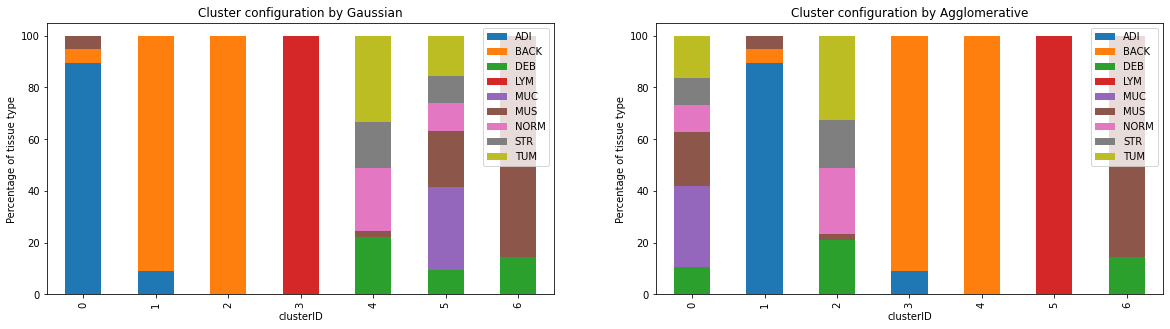

In [ ]:
#PathogenGAN UMAP
resulted_cluster_df = pd.DataFrame({'clusterID': gaussian_assignment_pge_umap, 'type': pge_umap_test_label})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='upper right')
axes[0].set_title('Cluster configuration by Gaussian')

resulted_cluster_df = pd.DataFrame({'clusterID': agglomerative_assignment_pge_umap, 'type': pge_umap_test_label})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[1] )

axes[1].set_ylabel('Percentage of tissue type')
axes[1].legend(loc='upper right')
axes[1].set_title('Cluster configuration by Agglomerative')

resulted_cluster_df = pd.DataFrame({'clusterID': gaussian_assignment_pge_umap, 'type': pge_umap_test_label})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f.show()

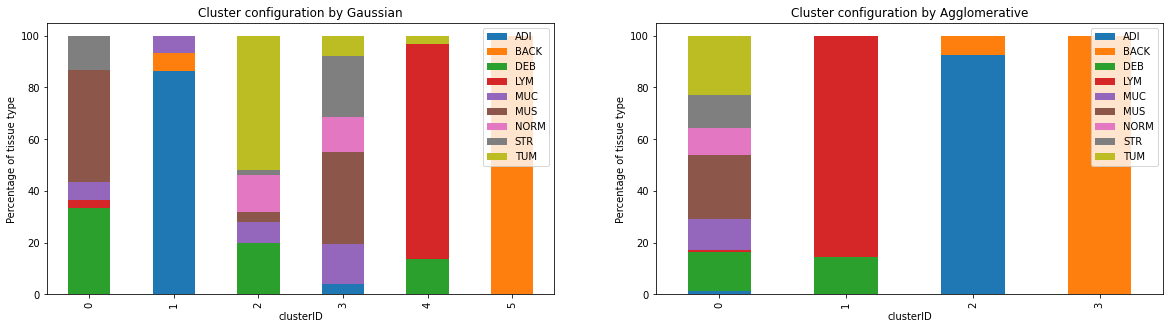

In [ ]:
#ResNet50 PCA
resulted_cluster_df = pd.DataFrame({'clusterID': gaussian_assignment_resnet50_pca, 'type': resnet50_pca_test_label})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='upper right')
axes[0].set_title('Cluster configuration by Gaussian')

resulted_cluster_df = pd.DataFrame({'clusterID': agglomerative_assignment_resnet50_pca, 'type': resnet50_pca_test_label})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[1] )

axes[1].set_ylabel('Percentage of tissue type')
axes[1].legend(loc='upper right')
axes[1].set_title('Cluster configuration by Agglomerative')

resulted_cluster_df = pd.DataFrame({'clusterID': gaussian_assignment_resnet50_pca, 'type': resnet50_pca_test_label})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f.show()

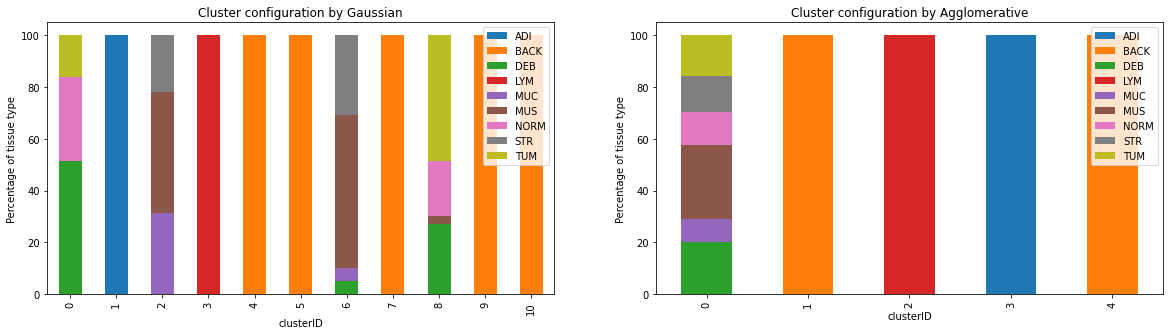

In [ ]:
#ResNet50 UMAP
resulted_cluster_df = pd.DataFrame({'clusterID': gaussian_assignment_resnet50_umap, 'type': resnet50_umap_test_label})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='upper right')
axes[0].set_title('Cluster configuration by Gaussian')

resulted_cluster_df = pd.DataFrame({'clusterID': agglomerative_assignment_resnet50_umap, 'type': resnet50_umap_test_label})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[1] )

axes[1].set_ylabel('Percentage of tissue type')
axes[1].legend(loc='upper right')
axes[1].set_title('Cluster configuration by Agglomerative')

resulted_cluster_df = pd.DataFrame({'clusterID': gaussian_assignment_resnet50_umap, 'type': resnet50_umap_test_label})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f.show()